In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [14]:
data = pd.read_csv('C:/Users/HP/Downloads/Data_sets/1.01.+Simple+linear+regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [15]:
feature = data['SAT']
target = data['GPA']

f_matrix = feature.values.reshape(-1,1)

In [16]:
f_matrix.shape

(84, 1)

In [17]:
reg = LinearRegression()
# Now reg is an instance of class LinearRegression

In [18]:
reg.fit(f_matrix, target)

LinearRegression()

In [19]:
reg.score(f_matrix, target) # It gives the value of R-Squared

0.40600391479679765

In [20]:
reg.coef_

array([0.00165569])

In [21]:
reg.intercept_

0.27504029966028076

In [22]:
value = 1740
array_value = np.array([value]).reshape(-1,1)
reg.predict(array_value)

array([3.15593751])

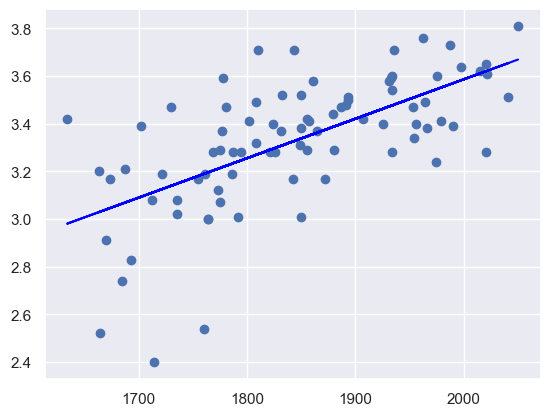

In [23]:
plt.scatter(feature, target)
regression_line = reg.intercept_ + reg.coef_ * f_matrix
plt.plot(feature , regression_line, color = 'blue')

### Multi variable regression

In [25]:
df = pd.read_csv('C:/Users/HP/Downloads/Data_sets/1.02.+Multiple+linear+regression.csv')
feature = df[['SAT','Rand 1,2,3']]
target = df['GPA']
reg = LinearRegression()

In [26]:
reg.fit(feature, target) # The reshaping of is only required when we have single variable as feature

LinearRegression()

In [27]:
reg.score(feature, target)

0.4066811952814282

In [28]:
reg.intercept_

0.29603261264909486

In [29]:
reg.coef_

array([ 0.00165354, -0.00826982])

### Getting the Adjusted $R^2$ value
$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [30]:
feature.shape # In the above formula n stands for number of observations = 84 and p stands for number of pr
# -edictors = 2

(84, 2)

In [31]:
r2 = reg.score(feature , target)
n = feature.shape[0]
p = feature.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n -1) / (n - p - 1))
adjusted_r2

0.39203134825134

### Feature Selection

How to know the variables which are unneeded in a model? 
The process is called feature selection

In [32]:
from sklearn.feature_selection import f_regression

In [33]:
f_regression(feature, target) # The first part of array has F-statistics value for each of the values and 
# the second has the p values for each of the variables

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [34]:
p_values = f_regression(feature, target)[1]
p_values.round(3)
# So the p_value for SAT score is 0. and for random number column it is 67% that means that Random value 
# has no contribution

array([0.   , 0.676])

### Summary Table

In [35]:
reg_summary = pd.DataFrame(data = feature.columns.values, columns= ['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [36]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p_values'] = f_regression(feature, target)[1].round(3)

In [37]:
reg_summary

,Features,Coefficients,p_values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


### Feature Scaling
#### To solve the magnitude issues in data Transforming the data into standard scale
$\frac{x - μ}{σ}$

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(feature) # Now it has the mean and standard deviation of elements of feature data frame

StandardScaler()

In [40]:
# It tranforms the unscaled information into scaled information
f_scaler = scaler.transform(feature)

In [41]:
# As the value of SAT is way larger than the random number assigned it is not easy to see impact of both
reg = LinearRegression()
reg.fit(f_scaler, target)

LinearRegression()

In [42]:
reg_summary = pd.DataFrame(data = feature.columns.values, columns= ['Features'])

In [43]:
reg_summary['Weights'] = reg.coef_
reg_summary['p_values'] = f_regression(f_scaler, target)[1].round(3)

In [45]:
reg_summary # The bigger the weight the bigger is the impact

,Features,Weights,p_values
0,SAT,0.171814,0.000
1,"Rand 1,2,3",-0.007030,0.676


#### The feature scaling is a very useful process as the weights along side the coefficient give more impactful details of features and about their impact instead of finding the p values and interpreting them, the lower the weight the less is the impact and the more useless the feature is 

## Predicting through standard coefficients

In [46]:
new_data = pd.DataFrame(data = [[1700, 2], [1800, 1]], columns = ['SAT', 'Rand 1,2,3'])
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [47]:
f_scaler = scaler.transform(new_data)

In [48]:
result = reg.predict(f_scaler)

In [49]:
new_data['GPA'] = result

In [50]:
new_data

,SAT,"Rand 1,2,3",GPA
0,1700,2,3.090514
1,1800,1,3.264138


In [51]:
from sklearn.model_selection import train_test_split

In [61]:
f_train, f_test = train_test_split(df, test_size = 0.2)

In [62]:
print('The number of training data observations: {0}'.format(f_train.shape[0]))
print('The number of testing data observations: {0}'.format(f_test.shape[0]))

The number of training data observations: 67
The number of testing data observations: 17
